In [19]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Load Dataset
TRAIN_CSV = "C:/Users/juane/OneDrive/Escritorio/Datos/Kaggle_Titanic/train.csv"
TEST_CSV = "C:/Users/juane/OneDrive/Escritorio/Datos/Kaggle_Titanic/test.csv"

In [21]:
#Join datasets
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
all_data_df = pd.concat([train_df, test_df], keys=['train', 'test'])

In [22]:
# Display the first few rows of the combined dataset
all_data_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
train 0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
      1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
      2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
      3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
      4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

         RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
train 0          0.0        0.0           0.0     0.0     0.0   
      1        109.0        9.0          25.0   549.0    44.0   
      2         43.0     3576.0           0.0  6715.0    49.0   
      3          0.0     1283.0         371.0  3329.0   193.0   
      4        303.0       70.0         151.0   565.0     2.0   

                      Name Transported  
train 0    Maham Ofracculy       False  
      1       Juanna Vines        True  
      2      Altark Susent       False  
      3       Solam Susent       False  
      4  Willy Santantines        True

In [23]:
#Display all the columns
all_data_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [24]:
#Select the columns for a better reading of the dataset
selected_columns = ['HomePlanet',
                    'CryoSleep',
                    'Destination', 
                    'Age',
                    'VIP',
                    'RoomService',
                    'FoodCourt',
                    'ShoppingMall',
                    'Spa',
                    'VRDeck',
                    'Transported'] # incluímos la variable objetivo

all_data_df = all_data_df[selected_columns]
all_data_df.head()                

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
train 0     Europa     False  TRAPPIST-1e  39.0  False          0.0   
      1      Earth     False  TRAPPIST-1e  24.0  False        109.0   
      2     Europa     False  TRAPPIST-1e  58.0   True         43.0   
      3     Europa     False  TRAPPIST-1e  33.0  False          0.0   
      4      Earth     False  TRAPPIST-1e  16.0  False        303.0   

         FoodCourt  ShoppingMall     Spa  VRDeck Transported  
train 0        0.0           0.0     0.0     0.0       False  
      1        9.0          25.0   549.0    44.0        True  
      2     3576.0           0.0  6715.0    49.0       False  
      3     1283.0         371.0  3329.0   193.0       False  
      4       70.0         151.0   565.0     2.0        True

In [25]:
# Display general information about the dataset
print(all_data_df.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [26]:
# Analyze missing values
print(all_data_df.isnull().sum())

HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64


In [27]:
# Handle missing values
# Fill missing values in numerical columns with the mean
all_data_df['Age'].fillna(all_data_df['Age'].mean(), inplace=True)
all_data_df['RoomService'].fillna(all_data_df['RoomService'].mean(), inplace=True)
all_data_df['FoodCourt'].fillna(all_data_df['FoodCourt'].mean(), inplace=True)
all_data_df['ShoppingMall'].fillna(all_data_df['ShoppingMall'].mean(), inplace=True)
all_data_df['Spa'].fillna(all_data_df['Spa'].mean(), inplace=True)
all_data_df['VRDeck'].fillna(all_data_df['VRDeck'].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
all_data_df['HomePlanet'].fillna(all_data_df['HomePlanet'].mode()[0], inplace=True)
all_data_df['CryoSleep'].fillna(all_data_df['CryoSleep'].mode()[0], inplace=True)
all_data_df['Destination'].fillna(all_data_df['Destination'].mode()[0], inplace=True)
all_data_df['VIP'].fillna(all_data_df['VIP'].mode()[0], inplace=True)
all_data_df['Transported'].fillna(all_data_df['Transported'].mode()[0], inplace=True)

In [28]:
# Verify that there are no missing values left
print(all_data_df.isnull().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [29]:
# Display statistical description of the dataset
all_data_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.236710,640.996685,1566.618306,583.550067,1117.835494,1167.840416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,79.000000,126.000000,47.000000,87.000000,64.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [30]:
# Function to identify outliers using the Interquartile Range (IQR)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [31]:
# Identify outliers in numerical columns
outliers_age = identify_outliers(all_data_df, 'Age')
outliers_room_service = identify_outliers(all_data_df, 'RoomService')
outliers_food_court = identify_outliers(all_data_df, 'FoodCourt')
outliers_shopping_mall = identify_outliers(all_data_df, 'ShoppingMall')
outliers_spa = identify_outliers(all_data_df, 'Spa')
outliers_vr_deck = identify_outliers(all_data_df, 'VRDeck')

# Display the number of outliers found
print(f"Outliers in Age: {len(outliers_age)}")
print(f"Outliers in RoomService: {len(outliers_room_service)}")
print(f"Outliers in FoodCourt: {len(outliers_food_court)}")
print(f"Outliers in ShoppingMall: {len(outliers_shopping_mall)}")
print(f"Outliers in Spa: {len(outliers_spa)}")
print(f"Outliers in VRDeck: {len(outliers_vr_deck)}")

Outliers in Age: 237
Outliers in RoomService: 2746
Outliers in FoodCourt: 2710
Outliers in ShoppingMall: 2756
Outliers in Spa: 2688
Outliers in VRDeck: 2747


In [32]:
# Save the cleaned dataset in the specified path
all_data_df.to_csv("C:/Users/juane/OneDrive/Escritorio/Datos/Kaggle_Titanic/cleaned_data.csv", index=False)

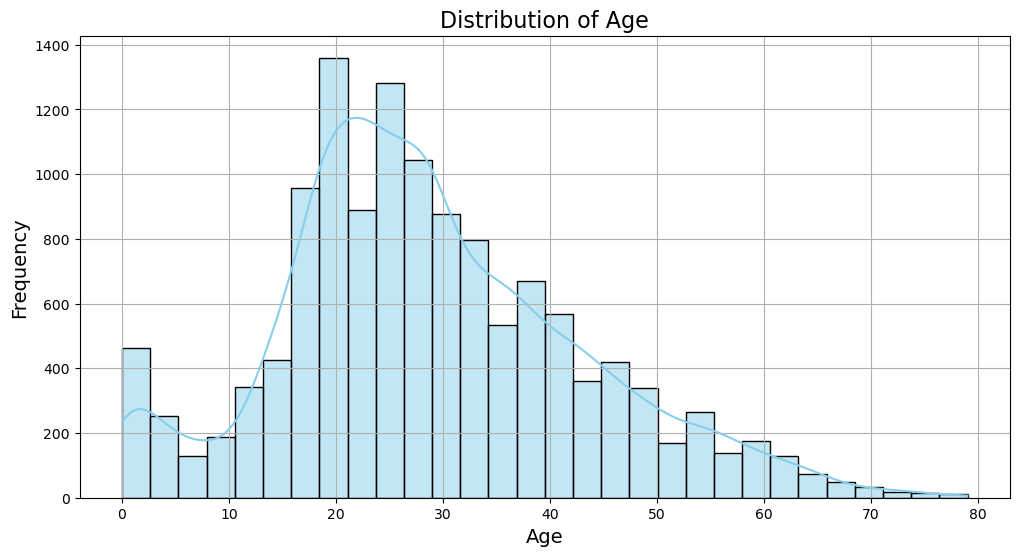

In [33]:
#Create some plots to analyze the dataset

#Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(all_data_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

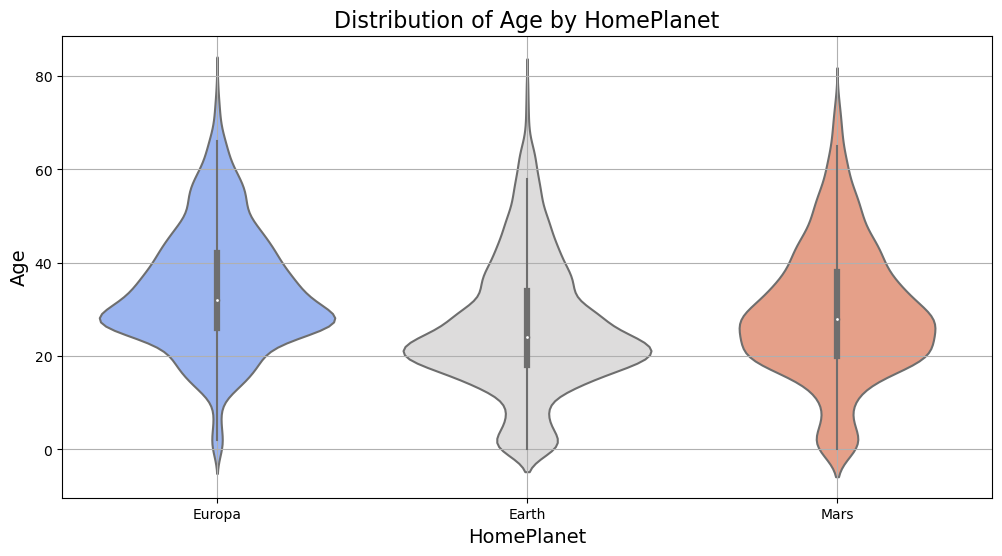

In [34]:
#Distribution of Age by HomePlanet
plt.figure(figsize=(12, 6))
sns.violinplot(x='HomePlanet', y='Age', data=all_data_df, palette='coolwarm')
plt.title('Distribution of Age by HomePlanet', fontsize=16)
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()

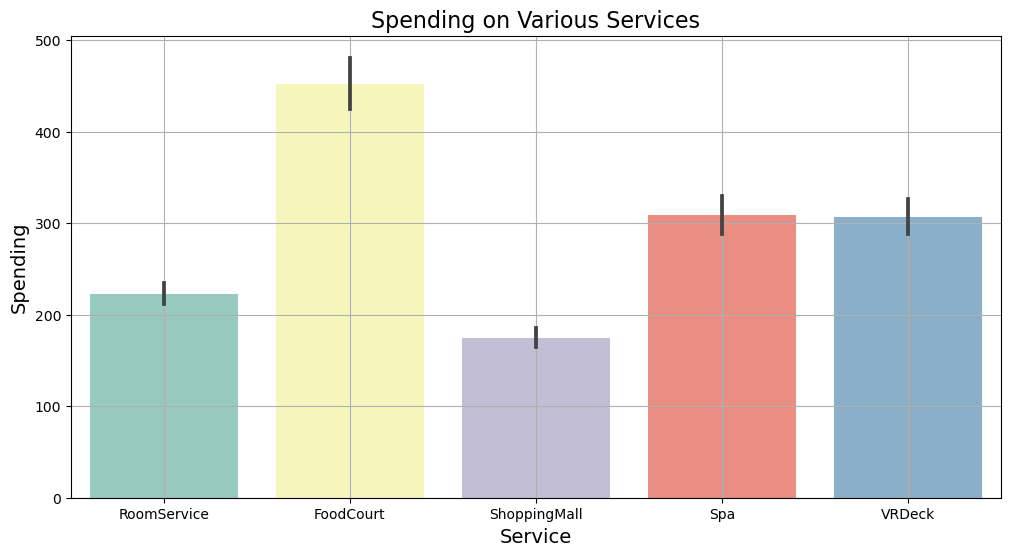

In [35]:
#Spending on RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck
plt.figure(figsize=(12, 6))
sns.barplot(data=all_data_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']], palette='Set3')
plt.title('Spending on Various Services', fontsize=16)
plt.xlabel('Service', fontsize=14)
plt.ylabel('Spending', fontsize=14)
plt.grid(True)
plt.show()

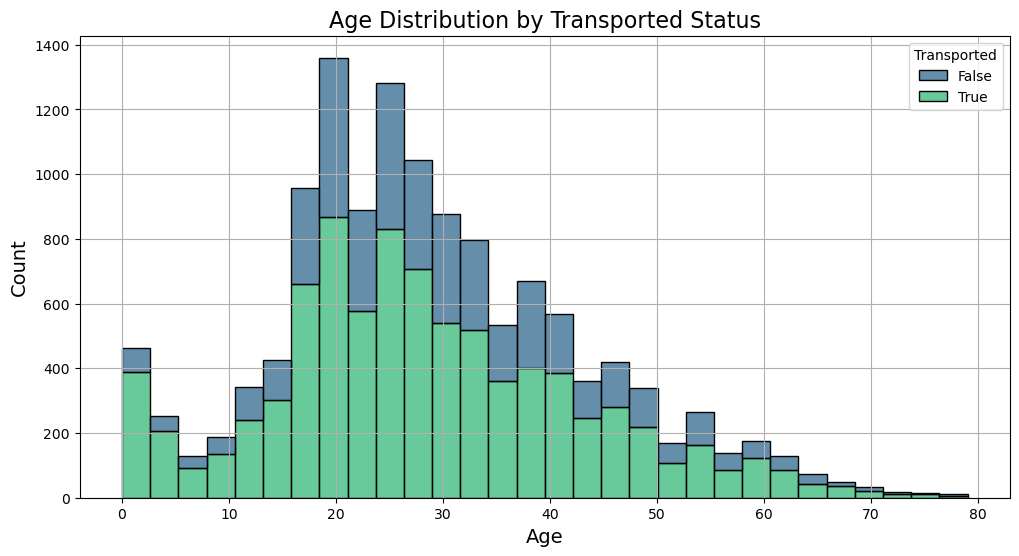

In [36]:
#Age Distribution by Transported Status
plt.figure(figsize=(12, 6))
sns.histplot(data=all_data_df, x='Age', hue='Transported', multiple='stack', palette='viridis', bins=30)
plt.title('Age Distribution by Transported Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

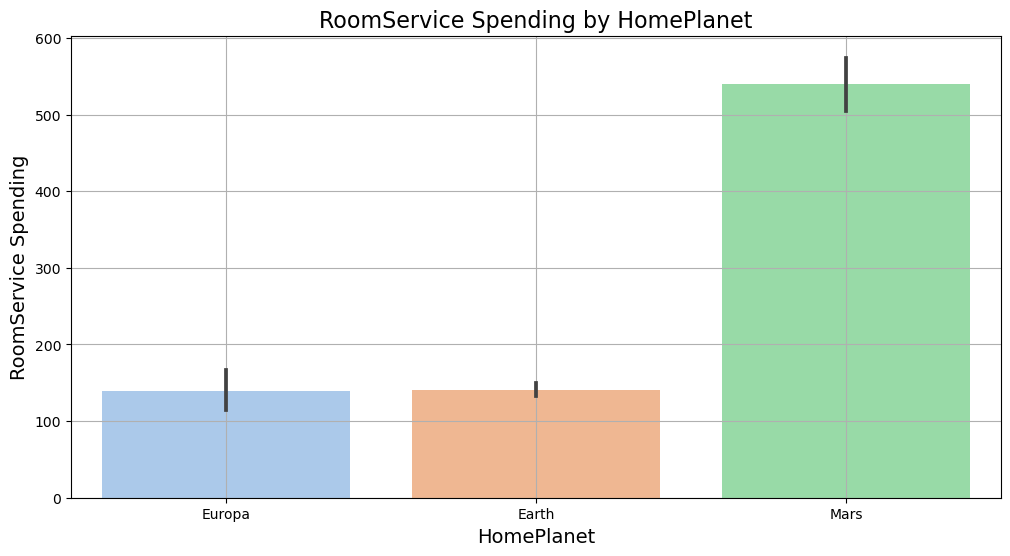

In [37]:
#Spending on RoomService by HomePlanet
plt.figure(figsize=(12, 6))
sns.barplot(x='HomePlanet', y='RoomService', data=all_data_df, palette='pastel')
plt.title('RoomService Spending by HomePlanet', fontsize=16)
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('RoomService Spending', fontsize=14)
plt.grid(True)
plt.show()

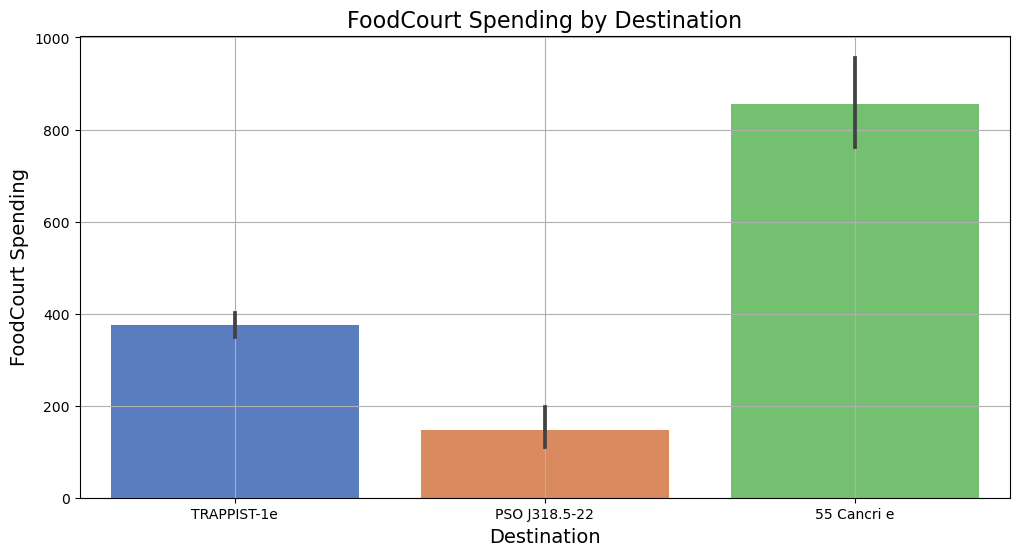

In [38]:
#Spending on FoodCourt by Destination
plt.figure(figsize=(12, 6))
sns.barplot(x='Destination', y='FoodCourt', data=all_data_df, palette='muted')
plt.title('FoodCourt Spending by Destination', fontsize=16)
plt.xlabel('Destination', fontsize=14)
plt.ylabel('FoodCourt Spending', fontsize=14)
plt.grid(True)
plt.show()

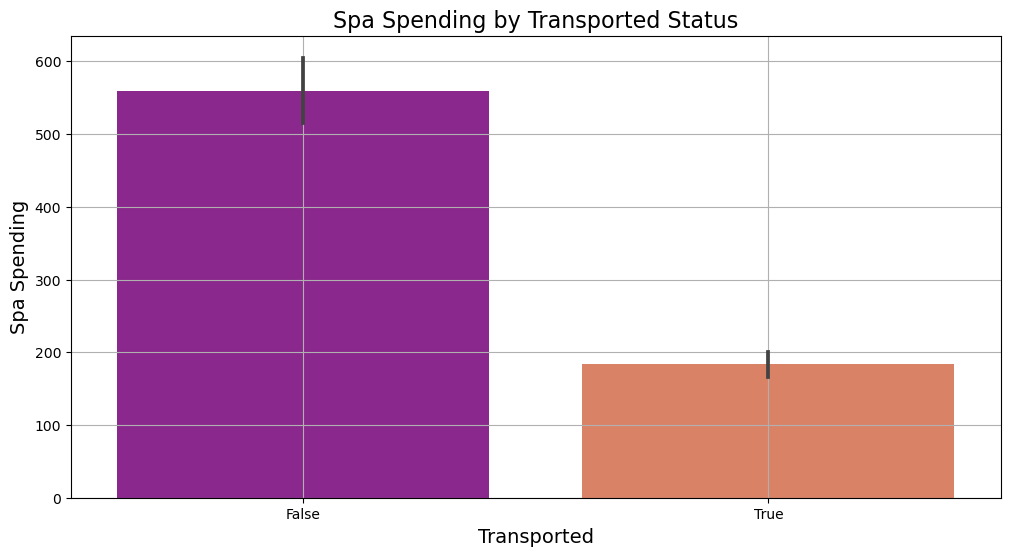

In [39]:
#Spending on Spa by Transported Status
plt.figure(figsize=(12, 6))
sns.barplot(x='Transported', y='Spa', data=all_data_df, palette='plasma')
plt.title('Spa Spending by Transported Status', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Spa Spending', fontsize=14)
plt.grid(True)
plt.show()

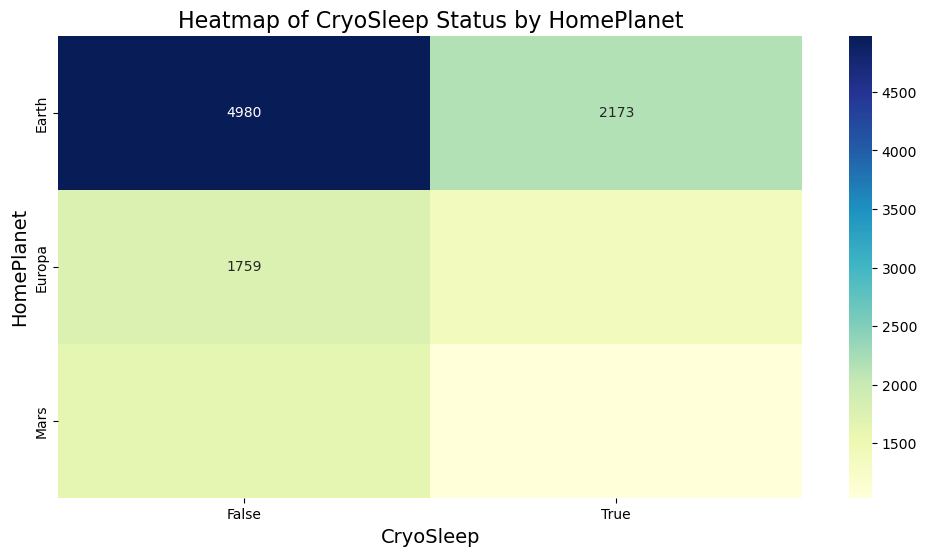

In [40]:
#Heatmap of CryoSleep Status by HomePlanet
plt.figure(figsize=(12, 6))
cryo_homeplanet_pivot = all_data_df.pivot_table(index='HomePlanet', columns='CryoSleep', aggfunc='size', fill_value=0)
sns.heatmap(cryo_homeplanet_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of CryoSleep Status by HomePlanet', fontsize=16)
plt.xlabel('CryoSleep', fontsize=14)
plt.ylabel('HomePlanet', fontsize=14)
plt.show()

<Figure size 1200x600 with 0 Axes>

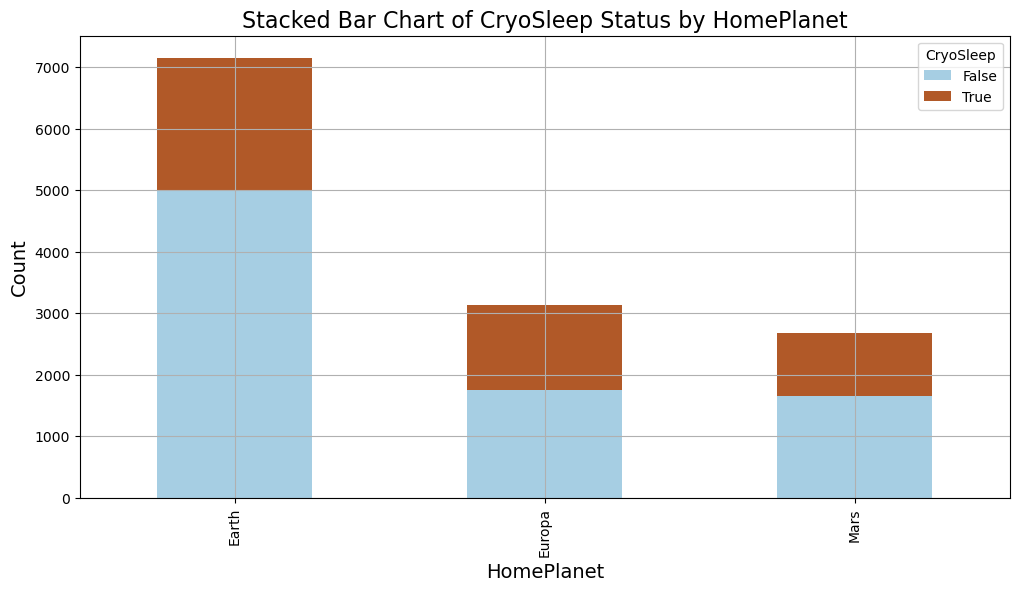

In [41]:
#Stacked Bar Chart of CryoSleep Status by HomePlanet
plt.figure(figsize=(12, 6))
cryo_homeplanet = all_data_df.groupby(['HomePlanet', 'CryoSleep']).size().unstack().fillna(0)
cryo_homeplanet.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12, 6))
plt.title('Stacked Bar Chart of CryoSleep Status by HomePlanet', fontsize=16)
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='CryoSleep')
plt.grid(True)
plt.show()

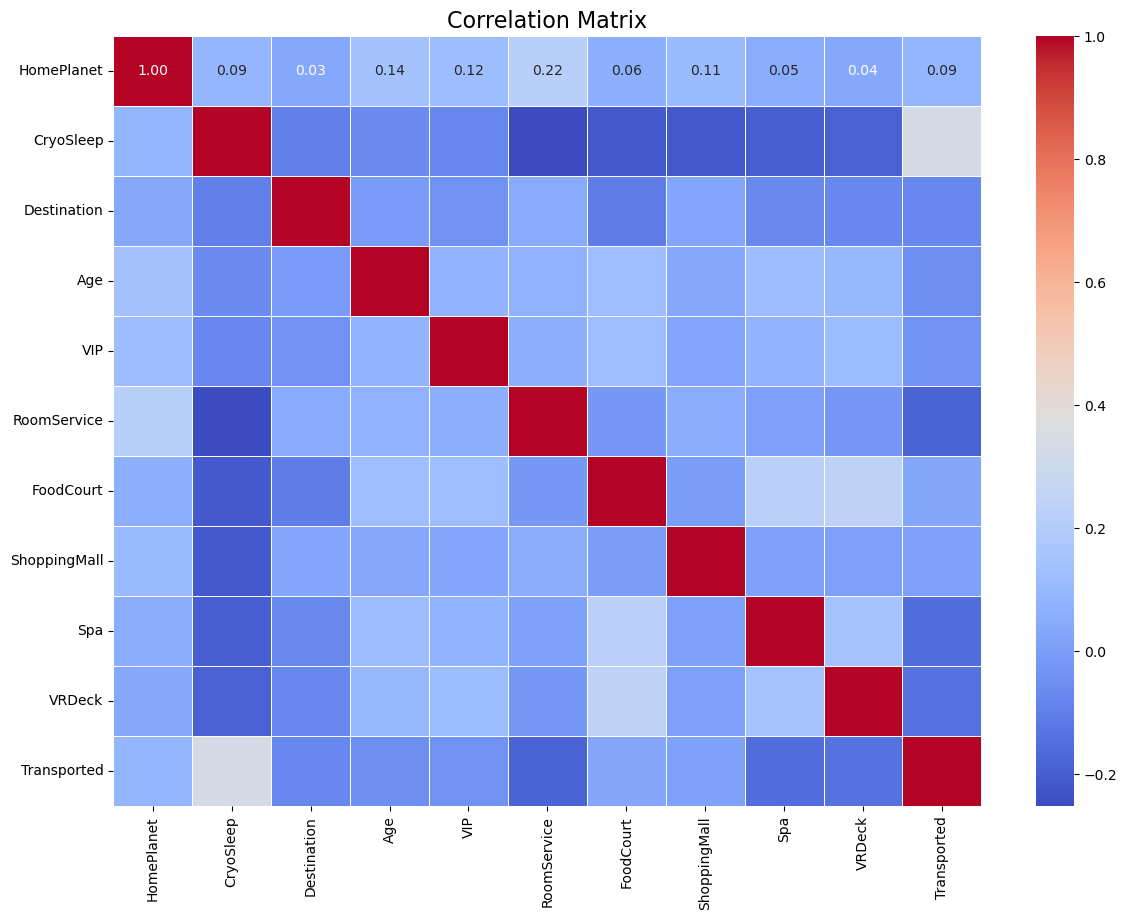

In [42]:
# Convert categorical variables to numerical for correlation analysis
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
for column in categorical_columns:
    all_data_df[column] = all_data_df[column].astype('category').cat.codes

# Calculate the correlation matrix
corr_matrix = all_data_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [43]:
corr_matrix

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.088630,0.033180,0.139811,0.119579,0.216149,0.064978,0.108768,0.052184,0.036323,0.086583
CryoSleep,0.088630,1.000000,-0.098933,-0.063832,-0.076891,-0.251759,-0.208124,-0.215163,-0.199169,-0.190276,0.332107
Destination,0.033180,-0.098933,1.000000,-0.010206,-0.037035,0.044914,-0.107585,0.025893,-0.067582,-0.071763,-0.071085
Age,0.139811,-0.063832,-0.010206,1.000000,0.080695,0.066101,0.121210,0.034182,0.115982,0.099858,-0.055904
VIP,0.119579,-0.076891,-0.037035,0.080695,1.000000,0.059386,0.122825,0.024184,0.080705,0.110160,-0.036678
RoomService,0.216149,-0.251759,0.044914,0.066101,0.059386,1.000000,-0.019720,0.055787,0.008801,-0.023429,-0.179106
FoodCourt,0.064978,-0.208124,-0.107585,0.121210,0.122825,-0.019720,1.000000,-0.001556,0.225865,0.240868,0.030647
ShoppingMall,0.108768,-0.215163,0.025893,0.034182,0.024184,0.055787,-0.001556,1.000000,0.010384,0.004301,0.008688
Spa,0.052184,-0.199169,-0.067582,0.115982,0.080705,0.008801,0.225865,0.010384,1.000000,0.145348,-0.158203
VRDeck,0.036323,-0.190276,-0.071763,0.099858,0.110160,-0.023429,0.240868,0.004301,0.145348,1.000000,-0.140214


## 🔍 Key Observations from the Correlation Matrix

### 🌍 HomePlanet:
- **RoomService**: Moderate positive correlation (0.216). Passengers from certain planets might spend more on room service.
- **Age**: Weak positive correlation (0.140). Older passengers might be more likely to come from certain planets.

### 💤 CryoSleep:
- **Transported**: Moderate positive correlation (0.332). Passengers in cryosleep are more likely to be transported.
- **RoomService**: Moderate negative correlation (-0.252). Passengers in cryosleep spend less on room service.
- **FoodCourt**: Moderate negative correlation (-0.208). Passengers in cryosleep spend less on food court.
- **ShoppingMall**: Moderate negative correlation (-0.215). Passengers in cryosleep spend less on shopping.
- **Spa**: Moderate negative correlation (-0.199). Passengers in cryosleep spend less on spa services.
- **VRDeck**: Moderate negative correlation (-0.190). Passengers in cryosleep spend less on VR deck.

### 🛬 Destination:
- **Transported**: Weak negative correlation (-0.071). The destination might slightly influence whether a passenger is transported.

### 👵 Age:
- **FoodCourt**: Weak positive correlation (0.121). Older passengers might spend more on food court.
- **Spa**: Weak positive correlation (0.116). Older passengers might spend more on spa services.
- **VRDeck**: Weak positive correlation (0.100). Older passengers might spend more on VR deck.

### 🌟 VIP:
- **FoodCourt**: Weak positive correlation (0.123). VIP passengers might spend more on food court.
- **VRDeck**: Weak positive correlation (0.110). VIP passengers might spend more on VR deck.

### 🛎️ RoomService:
- **Transported**: Weak negative correlation (-0.179). Higher spending on room service might slightly decrease the likelihood of being transported.

### 🍽️ FoodCourt:
- **Spa**: Moderate positive correlation (0.226). Passengers who spend more on food court also tend to spend more on spa services.
- **VRDeck**: Moderate positive correlation (0.241). Passengers who spend more on food court also tend to spend more on VR deck.

### 🧖 Spa:
- **Transported**: Weak negative correlation (-0.158). Higher spending on spa services might slightly decrease the likelihood of being transported.

### 🎮 VRDeck:
- **Transported**: Weak negative correlation (-0.140). Higher spending on VR deck might slightly decrease the likelihood of being transported.

## 💡 Insights for Machine Learning Model
- **CryoSleep** has the highest positive correlation with Transported, indicating it could be a significant predictor.
- **RoomService**, **Spa**, and **VRDeck** have negative correlations with Transported, suggesting that higher spending in these areas might decrease the likelihood of being transported.
- **HomePlanet** and **Age** show some correlation with spending habits, which might indirectly affect the Transported status.

These insights can help you select features for your machine learning model. You might consider including **CryoSleep**, **RoomService**, **Spa**, **VRDeck**, **HomePlanet**, and **Age** as features in the model.